In [1]:
import numpy as np
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchDecisionTreeClassifierDepth1:
    def __init__(self):
        self.threshold = None
        self.feature_index = None
        self.label_majority = None
        self.label_minority = None
        
    def calculate_gini_impurity(self, class_samples):
        total_samples = sum(class_samples)
        if total_samples == 0:
            return 0
        else:
            gini = 1
            for samples in class_samples:
                p_i = samples / total_samples
                gini -= p_i ** 2
            return gini

    def calculate_information_gain(self, parent_samples, left_samples, right_samples):
        parent_gini = self.calculate_gini_impurity(parent_samples)
        left_weight = sum(left_samples) / sum(parent_samples)
        right_weight = sum(right_samples) / sum(parent_samples)
        left_gini = self.calculate_gini_impurity(left_samples)
        right_gini = self.calculate_gini_impurity(right_samples)
        
        information_gain = parent_gini - (left_weight * left_gini + right_weight * right_gini)
        return information_gain

    def fit(self, X, y):
        best_ig = 0
        
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices
                
                left_samples = [sum(y[left_indices] == c) for c in np.unique(y)]
                right_samples = [sum(y[right_indices] == c) for c in np.unique(y)]
                parent_samples = [sum(y == c) for c in np.unique(y)]
                
                ig = self.calculate_information_gain(parent_samples, left_samples, right_samples)
                
                if ig > best_ig:
                    best_ig = ig
                    self.threshold = threshold
                    self.feature_index = feature_index

                    self.label_majority = np.argmax(left_samples)
                    self.label_minority = np.argmax(right_samples)
    def predict(self, X):
        predictions = []
        for sample in X:
            if sample[self.feature_index] < self.threshold:
                predictions.append(self.label_majority)
            else:
                predictions.append(self.label_minority)
        return np.array(predictions)



# Example usage
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([0, 1, 0, 1, 0])

clf = ScratchDecisionTreeClassifierDepth1()
clf.fit(X, y)
predictions = clf.predict(X)
print('Predictions:', predictions)



Predictions: [0 0 0 0 0]


In [7]:
# Load and preprocess Simple Dataset 2
X_train = np.array([[0.1, 0.5], [1.1, 2.3], [-1.5, -2.5], [2.0, 2.5], [-2.0, -1.5]])
y_train = np.array([0, 1, 0, 1, 0])  # Binary labels: 0 and 1

X_test = np.array([[0.3, 0.7], [1.8, 2.0], [-1.3, -2.0]])
y_test = np.array([0, 1, 0])  # Binary labels: 0 and 1


In [8]:
# Train and make predictions using the scratch implementation
clf_scratch = ScratchDecisionTreeClassifierDepth1()
clf_scratch.fit(X_train, y_train)
predictions_scratch = clf_scratch.predict(X_test)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train and make predictions using scikit-learn
clf_sklearn = DecisionTreeClassifier(random_state=42)
clf_sklearn.fit(X_train, y_train)
predictions_sklearn = clf_sklearn.predict(X_test)


In [10]:
# Calculate evaluation metrics for scratch implementation
accuracy_scratch = accuracy_score(y_test, predictions_scratch)
precision_scratch = precision_score(y_test, predictions_scratch)
recall_scratch = recall_score(y_test, predictions_scratch)

# Calculate evaluation metrics for scikit-learn implementation
accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
precision_sklearn = precision_score(y_test, predictions_sklearn)
recall_sklearn = recall_score(y_test, predictions_sklearn)

# Print the results
print("Evaluation Metrics:")
print("Scratch Implementation:")
print("  Accuracy:", accuracy_scratch)
print("  Precision:", precision_scratch)
print("  Recall:", recall_scratch)
print("Scikit-learn Implementation:")
print("  Accuracy:", accuracy_sklearn)
print("  Precision:", precision_sklearn)
print("  Recall:", recall_sklearn)


Evaluation Metrics:
Scratch Implementation:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
Scikit-learn Implementation:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0


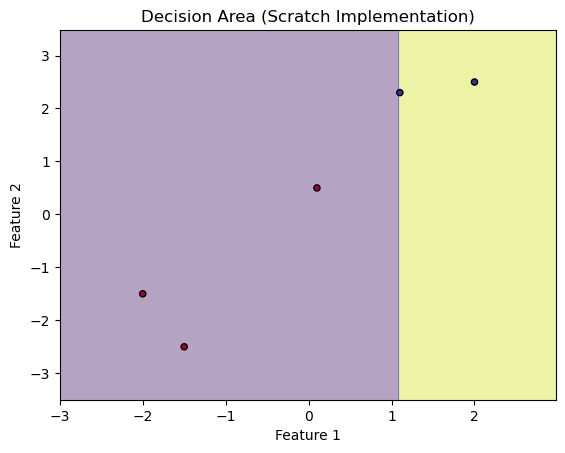

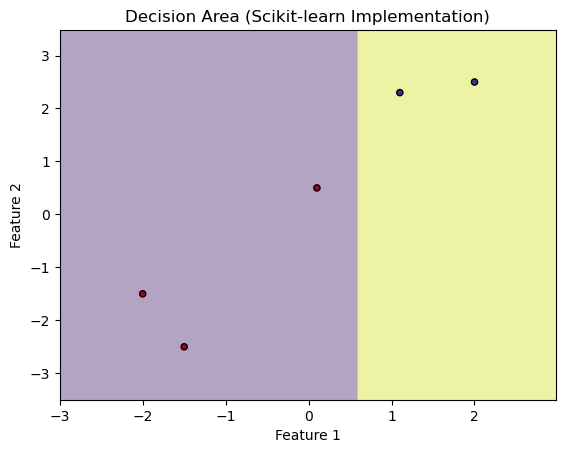

In [11]:
# Define a function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    # Create a meshgrid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict the class labels for each point in the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and training data points
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=20, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize decision area for scratch implementation
plot_decision_boundary(clf_scratch, X_train, y_train, 'Decision Area (Scratch Implementation)')

# Visualize decision area for scikit-learn implementation
plot_decision_boundary(clf_sklearn, X_train, y_train, 'Decision Area (Scikit-learn Implementation)')
